# Maze Visualization Demo

This notebook demonstrates the visualization capabilities of the maze runner game using the visualization utilities from the project.

In [14]:

import sys
import pygame
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import our maze game modules
from src.maze import create_maze
from src.visualization import visualize_maze, JupyterExplorer
from src.explorer import Explorer
from src.constants import WINDOW_SIZE


## Initialize Pygame for Jupyter

We need to initialize Pygame in a way that works with Jupyter notebooks.

In [21]:
# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

## Create and Visualize a Random Maze

Let's create a random maze and visualize it using the visualization utilities.

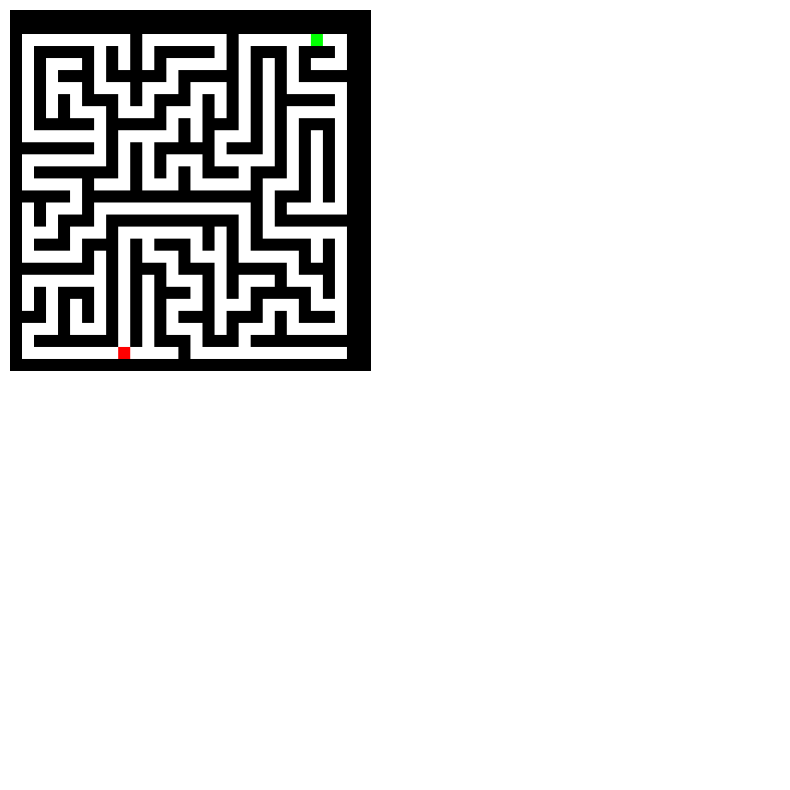

In [16]:
# Create and visualize a random maze
maze = create_maze(30, 30, "random")
visualize_maze(maze, screen)

## Animated Maze Solving

Let's use the JupyterExplorer to solve the maze with animation.

In [17]:
# Create maze and explorer
maze = create_maze(30, 30, "random")
explorer = JupyterExplorer(maze, screen)

# Run the explorer
time_taken, moves = explorer.solve()
print(f"Maze solved in {time_taken:.2f} seconds")
print(f"Number of moves: {len(moves)}")


=== Maze Exploration Statistics ===
Total time taken: 102.01 seconds
Total moves made: 675
Number of backtrack operations: 0
Average moves per second: 6.62

Maze solved in 102.01 seconds
Number of moves: 675


## Compare Different Maze Types

Let's compare the visualization of random and static mazes.

Random Maze:


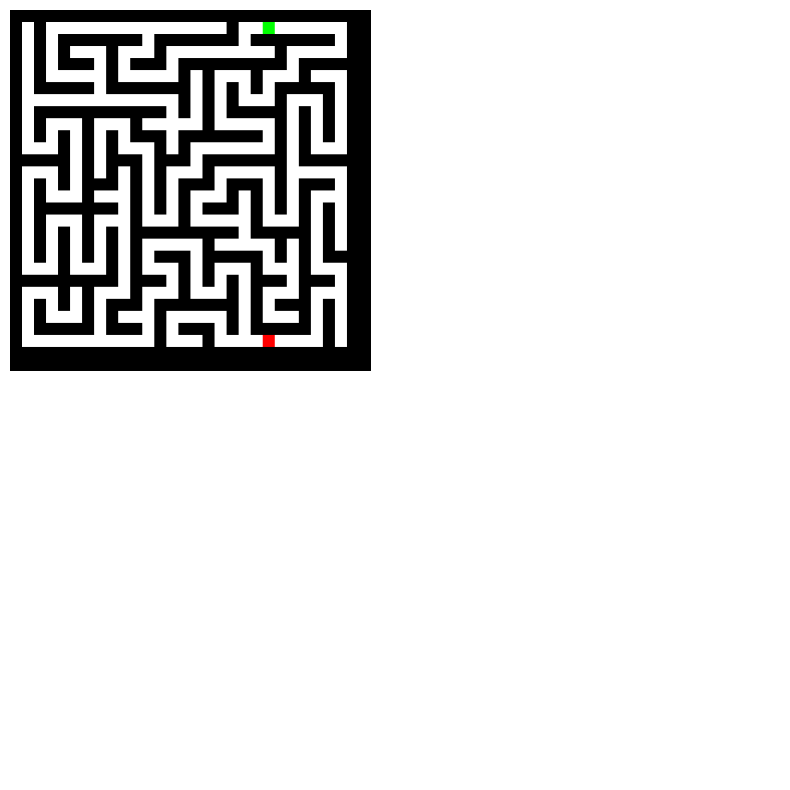

Static Maze:


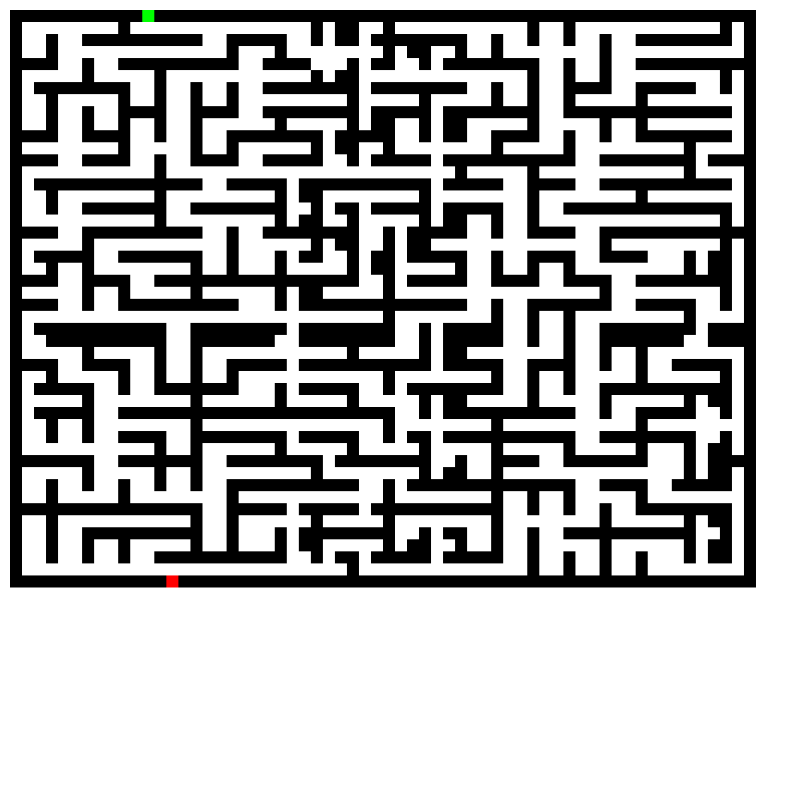

In [22]:
import time

# Create and visualize a random maze
random_maze = create_maze(30, 30, "random")
print("Random Maze:")
visualize_maze(random_maze, screen)
pygame.time.wait(1000)


# Create and visualize a static maze
static_maze = create_maze(30, 30, "static")
print("Static Maze:")
visualize_maze(static_maze, screen)

# # Keep window alive
# running = True
# while running:
#     for event in pygame.event.get():
#         if event.type == pygame.QUIT:
#             running = False

# pygame.quit()


## Performance Analysis

Let's analyze the performance of the automated explorer on different maze types.

In [ ]:
def run_exploration(maze_type, width, height):
    maze = create_maze(width, height, maze_type)
    explorer = Explorer(maze, visualize=False)
    start_time = time.time()
    
    time_taken, moves = explorer.solve()
   # Avoid divide by zero
    epsilon = 1e-6
    safe_time = time_taken if time_taken > epsilon else epsilon

    print(f"Average moves per second: {len(moves) / safe_time:.2f}")
    return {
        'maze_type': maze_type,
        'time_taken': time_taken,
        'moves': len(moves),
        'moves_per_second': len(moves) / safe_time
    }

# Run multiple explorations
results = []
for maze_type in ['random', 'static']:
    for _ in range(3):  # Run each type 3 times
        result = run_exploration(maze_type, 30, 30)
        results.append(result)
print("Simulation Done")
# Display results
df = pd.DataFrame(results)
print("Exploration Results:")
print(df.groupby('maze_type').mean())


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 718
Number of backtrack operations: 0
Average moves per second: 718000000.00

Average moves per second: 718000000.00

=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 451
Number of backtrack operations: 0
Average moves per second: 451000000.00

Average moves per second: 451000000.00

=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 287
Number of backtrack operations: 0
Average moves per second: 287000000.00

Average moves per second: 287000000.00

=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 1278483.04

Average moves per second: 1278483.04

=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 1278483.04

Average moves per second: 12

: 